In [3]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [165]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [166]:
# Charger l'ensemble de données California Housing
california_housing = fetch_california_housing()
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
data['target'] = california_housing.target
data.isnull().sum()


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [167]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [182]:
X = data['MedInc'].values.reshape(-1, 1)  # Utilisez ici votre fonctionnalité de choix
y = data['target'].values.reshape(-1, 1)  # Utilisez ici votre variable cible


In [183]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [184]:
type(X_train)
type(y_train)

numpy.ndarray

In [185]:
# Entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)
# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

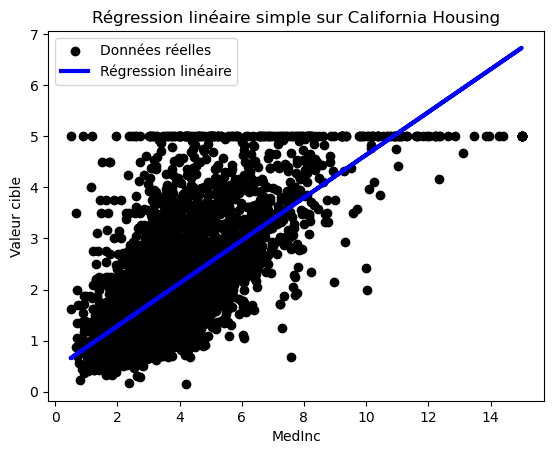

In [186]:
# Tracer les valeurs réelles par rapport aux prédictions
plt.scatter(X_test, y_test, color='black', label='Données réelles')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Régression linéaire')
plt.xlabel('MedInc')  # Remplacez 'MedInc' par le nom de votre fonctionnalité
plt.ylabel('Valeur cible')
plt.title('Régression linéaire simple sur California Housing')
plt.legend()
plt.show()



In [187]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
precision_percent = (1 - rmse / np.mean(y_test)) * 100
print(f"Précision en pourcentage : {precision_percent:.2f}%")

Précision en pourcentage : 59.02%
